In [1]:
import torch
from torch.nn import CrossEntropyLoss
from lambeq import BobcatParser
import numpy as np
epochs = 250
train_data = ['cat runs on land']
train_labels = [[0., 0. ,0.,1.]]

parser = BobcatParser()

In [2]:

train_diagrams = parser.sentences2diagrams(train_data)

loss = CrossEntropyLoss()

def CEL(y_hat, y):
    flattened_y_hat = y_hat.flatten()
    return float(loss(torch.tensor(flattened_y_hat), torch.tensor(y[0])))


def acc(y_hat, y):
    a=y_hat.flatten()
    #b=y_hat
    max_index = np.argmax(a)
    new_arr = np.zeros(a.shape)
    new_arr[max_index] = 1
    if np.array_equal(new_arr, y[0]):
        return 1
    else:
        return 0

from lambeq import AtomicType
from my_circuit_fixed_param_masking import IQPAnsatz
N = AtomicType.NOUN
S = AtomicType.SENTENCE
P = AtomicType.PREPOSITIONAL_PHRASE
ansatz = IQPAnsatz(masked_token='on', ob_map={N: 1, S: 1, P:1}, n_layers=3, n_single_qubit_params=6)
train_circuits = [ansatz(diagram) for diagram in train_diagrams]



from lambeq import NumpyModel
model = NumpyModel.from_diagrams(train_circuits)
from lambeq import QuantumTrainer, SPSAOptimizer

# here you can play around with hyperparameters
trainer = QuantumTrainer(
    model,
    loss_function=CEL,
    epochs=epochs,
    optimizer=SPSAOptimizer,
    optim_hyperparams={'a': 0.2, 'c': 0.06, 'A':0.01*epochs},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose = 'text',
    seed=0
)

from lambeq import Dataset

train_dataset = Dataset(
            train_circuits,
            train_labels,
            batch_size=1,
            shuffle=False)


Tagging sentences:   0%|          | 0/1 [00:00<?, ?it/s]

Parsing tagged sentences:   0%|          | 0/1 [00:00<?, ?it/s]

Parse trees to diagrams:   0%|          | 0/1 [00:00<?, ?it/s]

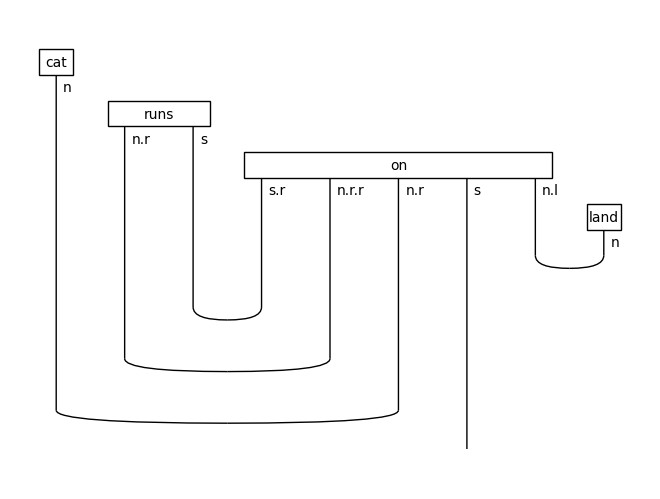

In [3]:
train_diagrams[0].draw()

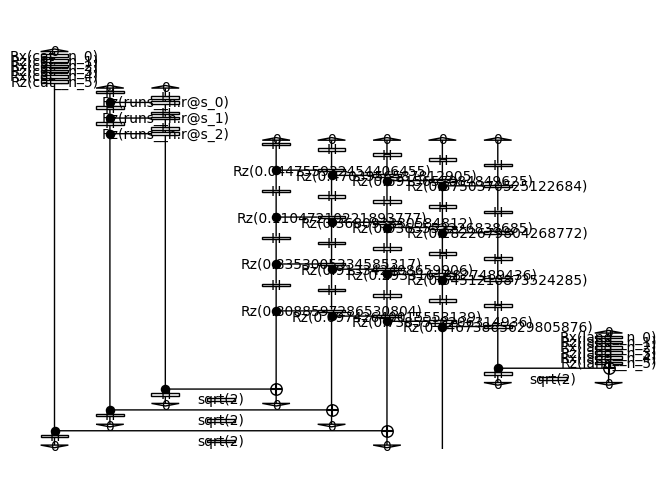

In [4]:
train_circuits[0].draw()

In [21]:
trainer.fit(train_dataset, logging_step=1)

Epoch 1:    train/loss: 2.2004   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 2:    train/loss: 2.1351   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 3:    train/loss: 2.0726   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 4:    train/loss: 2.1148   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 5:    train/loss: 1.9217   valid/loss: -----   train/acc: 1.0000   valid/acc: -----
Epoch 6:    train/loss: 2.1841   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 7:    train/loss: 1.9563   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 8:    train/loss: 2.0988   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 9:    train/loss: 2.1498   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 10:   train/loss: 2.1384   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 11:   train/loss: 2.1626   valid/loss: -----   train/acc: 0.0000   valid/acc: -----
Epoch 12: 

In [6]:
model.forward([train_circuits[0]]).flatten()

array([0.25, 0.25, 0.25, 0.25])

In [6]:
model.forward([train_circuits[0]]).flatten()

array([1., 0., 0., 0.])

In [12]:
model.forward([train_circuits[0]]).flatten()

array([0.38933569, 0.21646512, 0.34315832, 0.05104088])

In [14]:
model.forward([train_circuits[0]]).flatten()

array([0.0275428 , 0.21489481, 0.01723564, 0.74032675])

In [7]:
model.forward([train_circuits[0]]).flatten()

array([1., 0., 0., 0.])

In [7]:
model.forward([train_circuits[0]]).flatten()

array([0.25, 0.25, 0.25, 0.25])

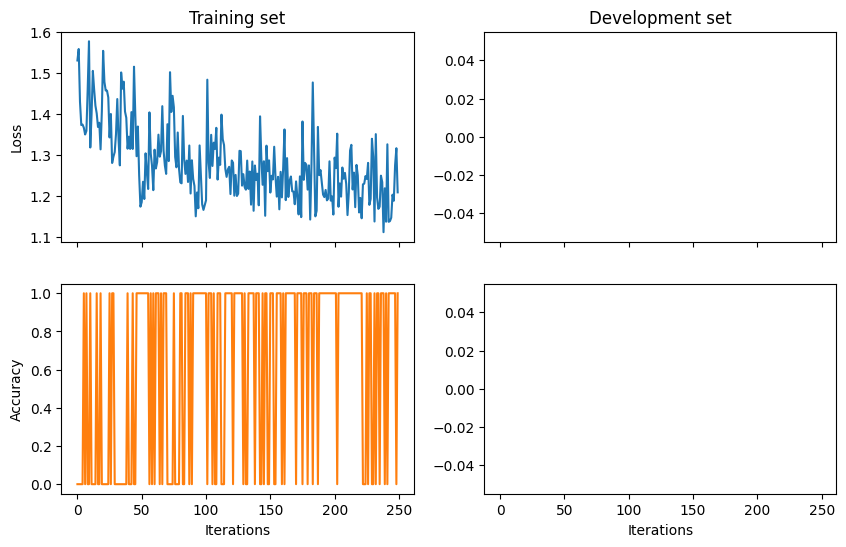

In [17]:
# plotting the results
import matplotlib.pyplot as plt

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))